In [3]:
import pandas as pd
from sklearn.utils import resample
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import sklearn.metrics as sm
import numpy as np
# import graphviz
# import pydot
# from graphviz import Source
import matplotlib.pyplot as plt

# import os

# os.environ["PATH"] += os.pathsep + 'C:/Users/ravit/Miniconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/'

adult_df = pd.read_csv("C:/Users/ravit/Project/adult.csv")
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


C:\Users\ravit\Miniconda3\envs\dv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ravit\Miniconda3\envs\dv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


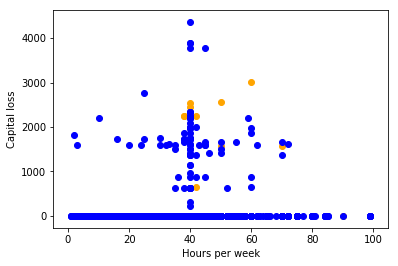

In [2]:
viz1 = adult_df[adult_df.relationship.str.contains('Unmarried') |
                     adult_df.relationship.str.contains('Own-child') |
                     adult_df.relationship.str.contains('Other-relative')][adult_df['capital-gain'] <= 4668.5]
# first_vis = second_vis[second_vis['age'] <= 5095.5]
# print(first_vis.head(10))
viz1 = viz1[viz1.age >= 29][viz1['education-num'] <= 12]

label1_vis = viz1[viz1.income.str.contains('>50K')]
label2_vis = viz1[viz1.income.str.contains('<=50K')]

label1_hour_per_week = label1_vis['hours-per-week'].tolist()
label1_capital_loss = label1_vis['capital-loss'].tolist()

label2_hour_per_week = label2_vis['hours-per-week'].tolist()
label2_capital_loss = label2_vis['capital-loss'].tolist()

plt.scatter(label1_hour_per_week, label1_capital_loss, color='orange')
plt.scatter(label2_hour_per_week, label2_capital_loss, color='blue')

plt.xlabel('Hours per week')
plt.ylabel('Capital loss')

plt.show()

(3754, 15)
(2532, 15)
(1222, 15)


C:\Users\ravit\Miniconda3\envs\dv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


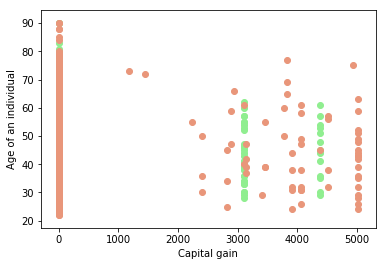

In [4]:
rel_list = ['Husband', 'Wife']
first_vis = adult_df[adult_df.relationship.str.contains('Husband') | adult_df.relationship.str.contains('Wife')][adult_df['education-num'] >= 13]
first_vis = first_vis[first_vis['capital-gain'] <= 5095.5]
# print(first_vis.head(10))

labe1_first_vis = first_vis[first_vis.income.str.contains('>50K')]
labe2_first_vis = first_vis[first_vis.income.str.contains('<=50K')]

print(first_vis.shape)
print(labe1_first_vis.shape)
print(labe2_first_vis.shape)


label1_ages = labe1_first_vis['age'].tolist()
label1_capital_gain = labe1_first_vis['capital-gain'].tolist()

label2_ages = labe2_first_vis['age'].tolist()
label2_capital_gain = labe2_first_vis['capital-gain'].tolist()

# boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
# grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.scatter(label1_capital_gain, label1_ages, color='lightgreen')
plt.scatter(label2_capital_gain, label2_ages, color='darksalmon')

plt.xlabel('Capital gain')
plt.ylabel('Age of an individual')
plt.show()

In [30]:
rel_list = ['Unmarried', 'Wife']
second_vis = adult_df[adult_df.relationship.str.contains('Unmarried') |
                     adult_df.relationship.str.contains('Own-child') |
                     adult_df.relationship.str.contains('Other-relative')][adult_df['capital-gain'] <= 4668.5]
# first_vis = second_vis[second_vis['age'] <= 5095.5]
# print(first_vis.head(10))

labe1_second_vis = second_vis[second_vis.income.str.contains('>50K')]
labe2_second_vis = second_vis[second_vis.income.str.contains('<=50K')]

print(first_vis.shape)
print(labe1_first_vis.shape)
print(labe2_first_vis.shape)


(3754, 15)
(2532, 15)
(1222, 15)


C:\Users\ravit\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


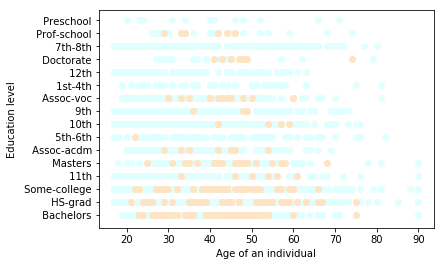

In [32]:
x = labe1_second_vis['education'].tolist()
y = labe2_second_vis['education'].tolist()

label1_ages = labe1_second_vis['age'].tolist()
label1_education_level = labe1_second_vis['education'].tolist()

label2_ages = labe2_second_vis['age'].tolist()
label2_education_level = labe2_second_vis['education'].tolist()

# boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
# grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.scatter(label2_ages, label2_education_level, color='lightcyan')
plt.scatter(label1_ages, label1_education_level, color='bisque')
plt.xlabel('Age of an individual')
plt.ylabel('Education level')
plt.show()

In [3]:
def get_label(row):
    if "<=50K" in row.income:
        return 0
    return 1

In [4]:
adult_df = adult_df.fillna(0)
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_df['label'] = adult_df.apply(lambda row: get_label(row), axis=1)
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [6]:
adult_df.drop(columns=['native-country','income', 'fnlwgt', 'education'],inplace=True)

adult_df['workclass'], val1 = pd.factorize(adult_df['workclass'])
# adult_df['education'] = preprocessing.LabelEncoder().fit_transform(adult_df['education'])
adult_df['marital-status'], val2 = pd.factorize(adult_df['marital-status'])
adult_df['occupation'], val3 = pd.factorize(adult_df['occupation'])
adult_df['relationship'], val4 = pd.factorize(adult_df['relationship'])
adult_df['race'], val5 = pd.factorize(adult_df['race'])
adult_df['sex'], val6 = pd.factorize(adult_df['sex'])

adult_df.to_csv("factorized_file.csv", sep=',', encoding='utf-8')
adult_df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,label
0,39,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,13,1,1,1,0,0,0,0,13,0
2,38,2,9,2,2,0,0,0,0,0,40,0
3,53,2,7,1,2,1,1,0,0,0,40,0
4,28,2,13,1,3,2,1,1,0,0,40,0
